<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hphp/HANI/library_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries

**Date: 26 December 2023**

##Objective
The primary focus of the assignment involves evaluating libraries suitable for big data applications, with particular attention to the difficulties associated with managing extensive datasets using Pandas and exploring alternative solutions offered by Dask and Modin.

Group Members:
<div align="center">

| NAME      | MATRIC NUMBER |
| :----:      |    :----:   |
| NADIA SYAFIQAH BINTI ZULKIPLI |  A21EC0098        |
| ALYA BALQISS BINTI AZAHAR  |  A21EC0158        |
| MUHAMMAD HARITH HAKIM BIN OTHMAN | A21EC0205       |
| MUHAMMAD IQMAL BIN SIS | A21EC0080     |




</div>

##**1. Dataset Selection**
The dataset that we chose is The UK Property Price data from year 1995-2023-04 and can be retrived through this link [UK Property Price data 1995-2023-04](https://www.kaggle.com/datasets/lorentzyeung/price-paid-data-202304).

**Size: ~4.94 GB**

##**2. Data Preparation & Cleaning**

###2.1 Import necessary libraries



*   To install the most recent stable release for Modin

In [1]:
!pip install modin[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6

<br>

Modin is a drop-in replacement for pandas, so simply **replace pandas** imports with **Modin imports** as follows to speed up the pandas workflows.

In [2]:
import pandas
import modin.pandas as pd

import time


### 2.2 Load the Dataset

*   Prompt to upload `kaggle.json` file



In [3]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadiasyafiqah","key":"77aa5208ed521d218af610ad2786fb75"}'}

In [4]:
!pip install kaggle #To install the Kaggle library
!mkdir -p ~/.kaggle #Create a directory named '.kaggle'
!cp kaggle.json ~/.kaggle/ #To copy a file named 'kaggle.json' to '.kaggle'directory
!chmod 600 ~/.kaggle/kaggle.json #To change access permission of file and directory

In [5]:
!kaggle datasets download lorentzyeung/price-paid-data-202304

100% 1.35G/1.36G [00:17<00:00, 73.8MB/s]
100% 1.36G/1.36G [00:17<00:00, 83.0MB/s]


In [6]:
!unzip price-paid-data-202304.zip

Archive:  price-paid-data-202304.zip
  inflating: 202304.csv              


###2.3 Sampling Data

In Modin, handling large datasets involves using distributed and parallel computing capabilities to perform operations efficiently. Sampling data from large files is beneficial for various tasks such as exploratory data analysis, visualization or reducing computational loads.

*   Read `.csv` file using Modin libraries.



In [43]:
filename = "202304.csv"

In [44]:
start = time.time()

modin_df = pd.read_csv(filename, nrows=100000) #To read only a particular number of rows from the.csv file.
end = time.time()
modin_duration = end - start #To calculate the duration for reading the file
print("Time to read with Modin: {} seconds".format(round(modin_duration, 3)))

Time to read with Modin: 0.668 seconds


*   To review memory usage of file:



In [45]:
modin_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   {F887F88E-7D15-4415-804E-52EAC2F10958}  100000 non-null  object
 1   70000                                   100000 non-null  int64 
 2   1995-07-07 00:00                        100000 non-null  object
 3   MK15 9HP                                99933 non-null   object
 4   D                                       100000 non-null  object
 5   N                                       100000 non-null  object
 6   F                                       100000 non-null  object
 7   31                                      99995 non-null   object
 8   Unnamed: 8                              7563 non-null    object
 9   ALDRICH DRIVE                           98460 non-null   object
 10  WILLEN                                  97629 non-nu

*   Use the **sample()** method to extract a random sample from the Modin DataFrame.



In [46]:
#Perform the sampling with size=10%
start = time.time()

modin_sampling = modin_df.sample(frac = 0.1, random_state = 42)
end = time.time()
modin_sampling_duration = end - start

**Note:** `frac=0.1` means that 10% of the original dataset will be sampled.

Observe few measurements such as file size and computation time.

In [47]:
import os

final_file_size = os.path.getsize(filename) / (1024 ** 2)  # File size in MB
computation_time = modin_sampling_duration  #Computation time of sampling

print(f"File Size after Sampling: {final_file_size:.2f} MB")
print("Time to sampling data with Modin: {} seconds".format(round(modin_sampling_duration, 2)))

File Size after Sampling: 4714.51 MB
Time to sampling data with Modin: 0.02 seconds


###2.4 Renaming the columns name

Since we noticed that the dataframe did not include header name for its columns, we will add suitable columns name by referencing with the information provided on the Kaggle website.

In [48]:
print("The current column names: ")
modin_df.columns

The current column names: 


Index(['{F887F88E-7D15-4415-804E-52EAC2F10958}', '70000', '1995-07-07 00:00',
       'MK15 9HP', 'D', 'N', 'F', '31', 'Unnamed: 8', 'ALDRICH DRIVE',
       'WILLEN', 'MILTON KEYNES', 'MILTON KEYNES.1', 'MILTON KEYNES.2', 'A',
       'A.1'],
      dtype='object')

*   Each column will be named as follows:




In [49]:
modin_df.rename(columns = {'{F887F88E-7D15-4415-804E-52EAC2F10958}': 'Transaction Unique Identifier',
                            '70000': 'Price',
                            '1995-07-07 00:00': 'Transfer Date',
                            'MK15 9HP': 'Postcode',
                            'D': 'Property Type',
                            'N': 'Old/New',
                            'F': 'Duration',
                            '31': 'PAON',
                            'Unnamed: 8': 'SAON',
                            'ALDRICH DRIVE': 'Street',
                            'WILLEN': 'Locality',
                            'MILTON KEYNES': 'Town/City',
                            'MILTON KEYNES.1': 'District',
                            'MILTON KEYNES.2': 'County',
                            'A': 'PPDCategory Type',
                            'A.1': 'Record Status - Monthly File Only'}, inplace=True)

Display the columns of the dataframe by run the following command:

In [50]:
print("The updated column names: ")
modin_df.columns

The updated column names: 


Index(['Transaction Unique Identifier', 'Price', 'Transfer Date', 'Postcode',
       'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON', 'Street',
       'Locality', 'Town/City', 'District', 'County', 'PPDCategory Type',
       'Record Status - Monthly File Only'],
      dtype='object')

Another way to review the updated column name is by using `head()` as follows:

In [51]:
modin_df.head()

,Transaction Unique Identifier,Price,Transfer Date,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory Type,Record Status - Monthly File Only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,NaN,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A


### 2.5 Optimise data types of dataset

By optimizing the data types, it can help to reduce the memory usage. Firstly, we need to review the dataframe information which includes every data types of each columns and the memory usage.

In [52]:
modin_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction Unique Identifier      100000 non-null  object
 1   Price                              100000 non-null  int64 
 2   Transfer Date                      100000 non-null  object
 3   Postcode                           99933 non-null   object
 4   Property Type                      100000 non-null  object
 5   Old/New                            100000 non-null  object
 6   Duration                           100000 non-null  object
 7   PAON                               99995 non-null   object
 8   SAON                               7563 non-null    object
 9   Street                             98460 non-null   object
 10  Locality                           97629 non-null   object
 11  Town/City                          100000 non-nu

Based on the information provided above, we may examine the data type of each column and modify it to a more appropriate data type to reduce memory usage.

In [53]:
start_time = time.time()

data_types = {
    'Transaction Unique Identifier': 'str',
    'Price': 'float32',
    'Transfer Date': 'datetime64',
    'Postcode': 'str',
    'Property Type': 'category',
    'Old/New': 'category',
    'Duration': 'category',
    'PAON': 'str',
    'SAON': 'str',
    'Street': 'str',
    'Locality': 'str',
    'Town/City': 'str',
    'District': 'str',
    'County': 'str',
    'PPDCategory Type': 'category',
    'Record Status - Monthly File Only': 'category'}

for column, dtype in data_types.items():
  if dtype == 'str':
    modin_df[column] = modin_df[column].astype(dtype)
  elif dtype == 'float32':
    modin_df[column] = pd.to_numeric(modin_df[column].astype(dtype), errors='coerce')
  elif dtype == 'datetime64':
    modin_df[column] = pd.to_datetime(modin_df[column])
  elif dtype == 'category':
    modin_df[column] = modin_df[column].astype(dtype)
  else:
    modin_df[column] = modin_df[column].astype(dtype)

end = time.time()
modin_optimization_duration = end - start

In [54]:

print("Time to optimize data type with Modin: {} seconds".format(round(modin_optimization_duration, 2)))

Time to optimize data type with Modin: 1.29 seconds


In [55]:
modin_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Transaction Unique Identifier      100000 non-null  <U0           
 1   Price                              100000 non-null  float32       
 2   Transfer Date                      100000 non-null  datetime64[ns]
 3   Postcode                           100000 non-null  <U0           
 4   Property Type                      100000 non-null  category      
 5   Old/New                            100000 non-null  category      
 6   Duration                           100000 non-null  category      
 7   PAON                               100000 non-null  <U0           
 8   SAON                               100000 non-null  <U0           
 9   Street                             100000 non-null  <U0           
 10  Locality        

As shown in the above dataframe information, the memory usage has been reduce from 12.2+ MB to 8.5 MB
<br>

**Note:** `<UO` data type is represents Unicode strings.

### 2.6 Handle missing values

Observe the total of missing values for each columns.

In [56]:
modin_df.dropna(inplace=True)

In [57]:
modin_df.isna().sum()

Transaction Unique Identifier        0
Price                                0
Transfer Date                        0
Postcode                             0
Property Type                        0
Old/New                              0
Duration                             0
PAON                                 0
SAON                                 0
Street                               0
Locality                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - Monthly File Only    0
dtype: int64

Since there is no missing values found for each column, we will continue for the next data preparation.

### 2.7 Dropping unnecessary columns

Some columns may contain irrelevant data that is not important to the analysis. In this section, we will remove specific columns from the dataframe.

In [58]:
drop_columns = ['SAON', 'Duration', 'PPDCategory Type', 'Record Status - Monthly File Only']

In [59]:
modin_df.drop(columns=drop_columns, axis=1, inplace=True)

*   To  observe the modified dataframe after dropping certain columns, run this following command:




In [60]:
modin_df.head()

,Transaction Unique Identifier,Price,Transfer Date,Postcode,Property Type,Old/New,PAON,Street,Locality,Town/City,District,County
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500.0,1995-02-03,SR6 0AQ,T,N,50,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500.0,1995-01-13,CO6 1SQ,T,N,19,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000.0,1995-07-28,B90 4TG,T,N,37,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000.0,1995-06-28,DY5 1SA,S,N,59,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000.0,1995-03-10,S65 1QJ,T,N,22,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE


*   To review the memory usage after dropping the columns:



In [61]:
modin_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Transaction Unique Identifier  100000 non-null  <U0           
 1   Price                          100000 non-null  float32       
 2   Transfer Date                  100000 non-null  datetime64[ns]
 3   Postcode                       100000 non-null  <U0           
 4   Property Type                  100000 non-null  category      
 5   Old/New                        100000 non-null  category      
 6   PAON                           100000 non-null  <U0           
 7   Street                         100000 non-null  <U0           
 8   Locality                       100000 non-null  <U0           
 9   Town/City                      100000 non-null  <U0           
 10  District                       100000 non-null  <U0           
 

Memory usage has now been reduced from 8.5 MB to 7.4 MB

<br>


##**3. Exploratory Analysis and Visualization**

> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

### 3.1 General Statistics

*   To calculate number of elements(cells) in the dataframe, run the following command:



In [62]:
modin_df.size

1200000

*   To review the dataframe shape, run the following command:




In [63]:
modin_df.shape

(100000, 12)

This indicates that the dataframe contains 100000 rows and 12 columns.
<br>

**Note:** We have 10000 rows because we set `nrows=100000` during the `pd.read_csv` command.

### 3.2 Summary Statistics

We will just compute basic statistics using numerical columns because it is easier to do mathematical operations and calculations on this type of data.

We will be using the Price column as it is the only one containing numerical data.




*  To calculate sum, use sum() method as follows:




In [64]:
sum = modin_df['Price'].sum()
print(f"Sum: {sum:.2f}")

Sum: 6821065728.00


*  To calculate mean, use mean() method as follows:

In [65]:
mean = modin_df['Price'].mean()
print(f"Mean: {mean:.2f}")

Mean: 68210.66


*  To calculate median, use median() method as follows:

In [66]:
median = modin_df['Price'].median()
print(f"Median: {median:.2f}")

Median: 55000.00


* To calculate quartiles, use the following method:

In [67]:
first_quartile = modin_df['Price'].quantile(0.25) #25th percentile
third_quartile = modin_df['Price'].quantile(0.75) #75th percentile

print(f"First Quartile(25th): {first_quartile:.2f}")
print(f"Third Quartile(75th): {third_quartile:.2f}")

First Quartile(25th): 39995.00
Third Quartile(75th): 79000.00


### 3.3 Data Exploration

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

*   Histogram used to explore the trend of the `Price` in the dataset.




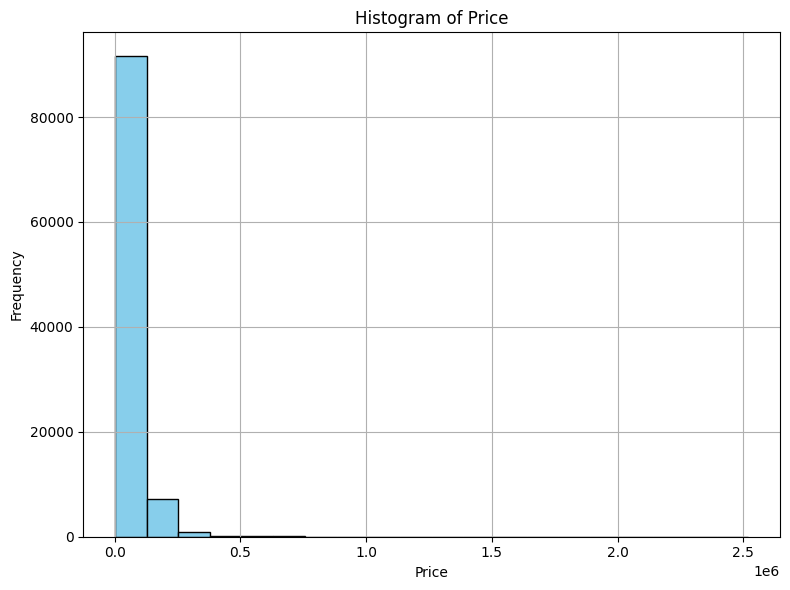

In [69]:
numeric_columns = modin_df.select_dtypes(include=['float32', 'int64'])

for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(modin_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

*   Generating a scatter plot to explore the relationship between `Price` and `Transfer Date`(Year).



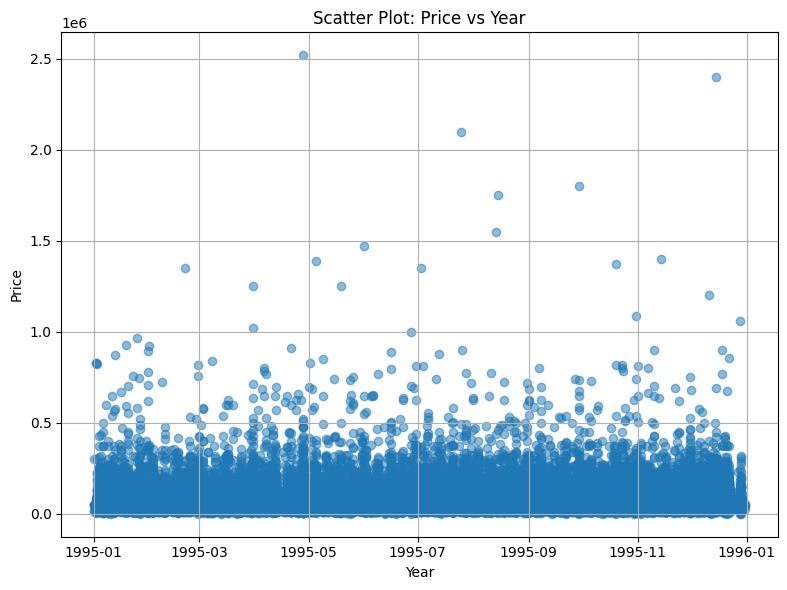

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(modin_df['Transfer Date'], modin_df['Price'], alpha=0.5)
plt.title('Scatter Plot: Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

*   Using Bar Chart to get an insight of the comparison between New and Old Properties.




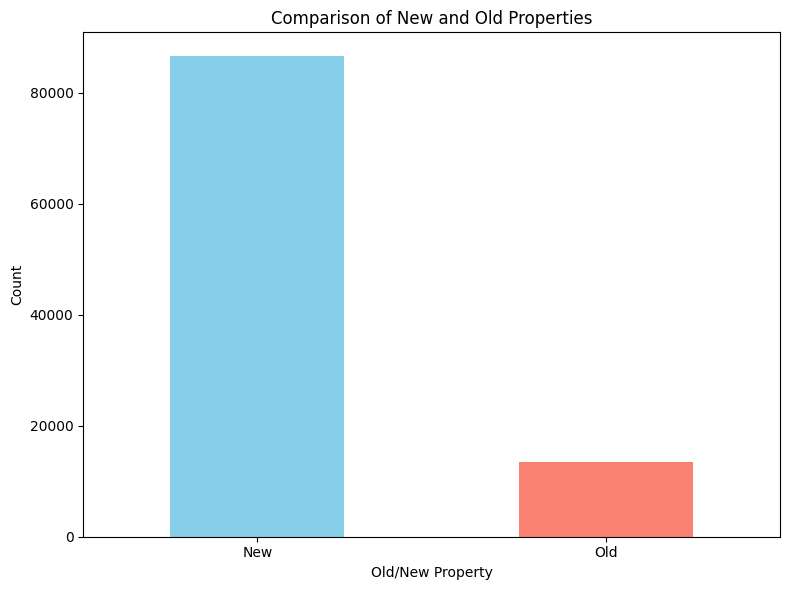

In [71]:
new_old_counts = modin_df['Old/New'].value_counts()

# Create a mapping for the labels
label_mapping = {'Y': 'Old', 'N': 'New'}

new_old_counts.index = new_old_counts.index.map(label_mapping)

plt.figure(figsize=(8, 6))
new_old_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of New and Old Properties')
plt.xlabel('Old/New Property')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

*   Using Bar Chart to explore the transaction count in top 5 localities.



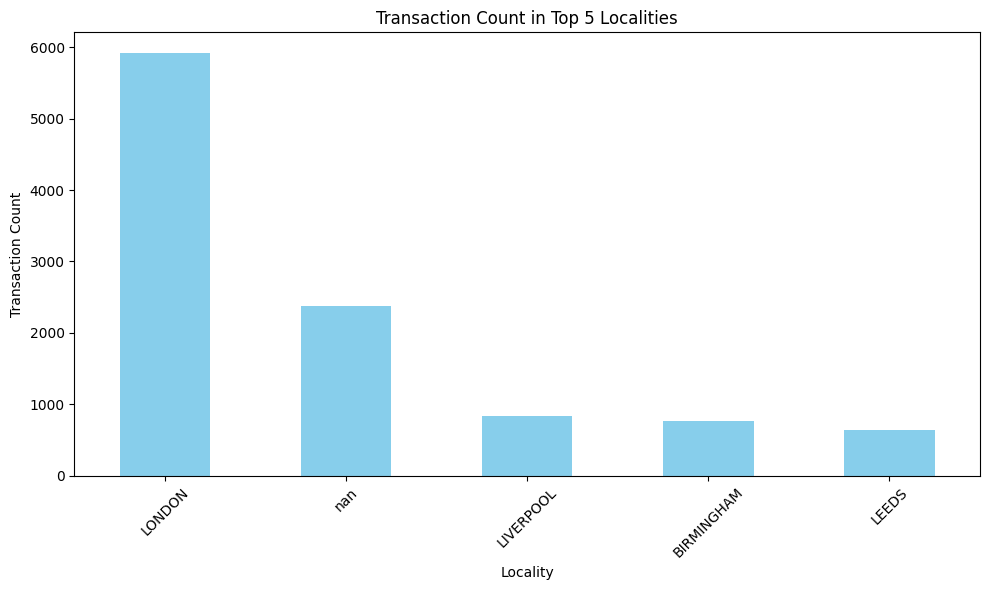

In [72]:
top_5_localities = modin_df['Locality'].value_counts().head(5).index

# Filter the DataFrame for the top 5 localities
modin_df_top_5_localities = modin_df[modin_df['Locality'].isin(top_5_localities)]

#modin_df_top_5_localities = modin_df_top_5_localities.dropna(subset=['Locality'])

locality_transaction_count = modin_df_top_5_localities['Locality'].value_counts()

plt.figure(figsize=(10, 6))
locality_transaction_count.plot(kind='bar', color='skyblue')
plt.title('Transaction Count in Top 5 Localities')
plt.xlabel('Locality')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4 Data Visualization

*  **Asking and Answering Questions**




1. What is the trend or direction in the annual number of transactions over the given period in the dataset?

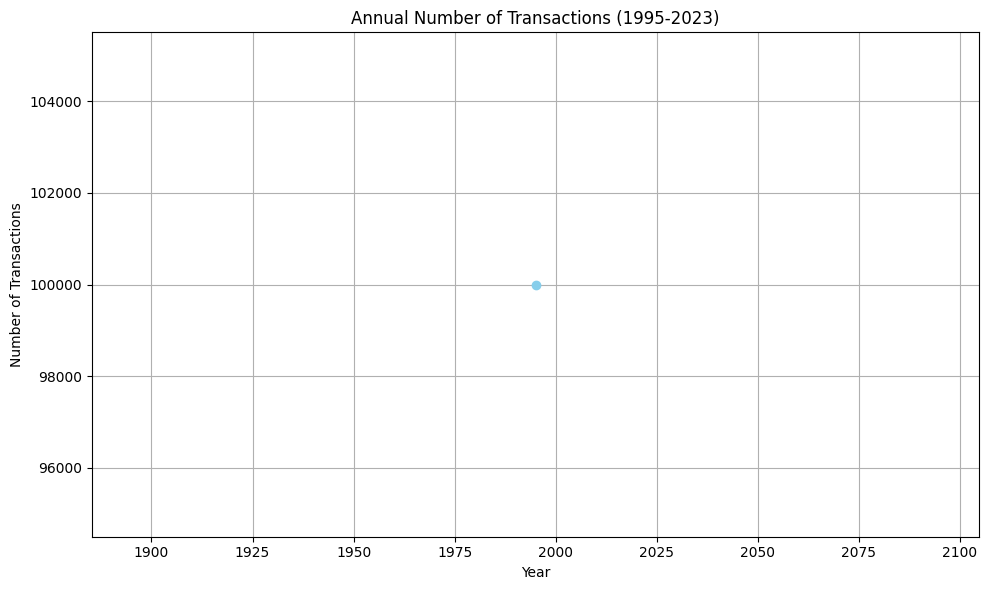

In [73]:
# Extracting year from 'Transfer Date'
modin_df['Year'] = modin_df['Transfer Date'].dt.year

# Counting transactions per year
transactions_per_year = modin_df['Year'].value_counts().sort_index()

# Plotting the trend of annual transactions
plt.figure(figsize=(10, 6))
transactions_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Annual Number of Transactions (1995-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

2. What insights can be inferred about the variation in the ratio of new to old properties within the top 10 districts, considering the distribution of new and old properties in these specific areas?

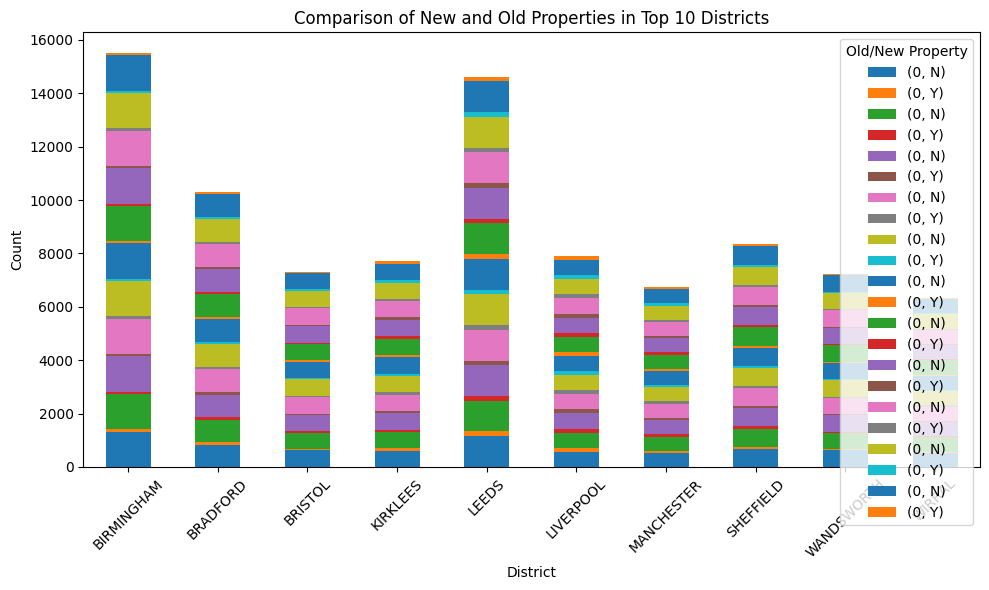

In [74]:
# Filtering for top 10 districts
top_10_districts = modin_df['District'].value_counts().head(10).index
modin_df_top_10_districts = modin_df[modin_df['District'].isin(top_10_districts)]

# Creating a pivot table to count new and old properties per district
new_old_properties = modin_df_top_10_districts.pivot_table(index='District', columns='Old/New', aggfunc='size', fill_value=0)

# Plotting a grouped bar chart
new_old_properties.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comparison of New and Old Properties in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Old/New Property')
plt.tight_layout()
plt.show()

3. Considering the dataset's **top 10 counties** by property count, what patterns emerge in the distribution of property types across these counties?

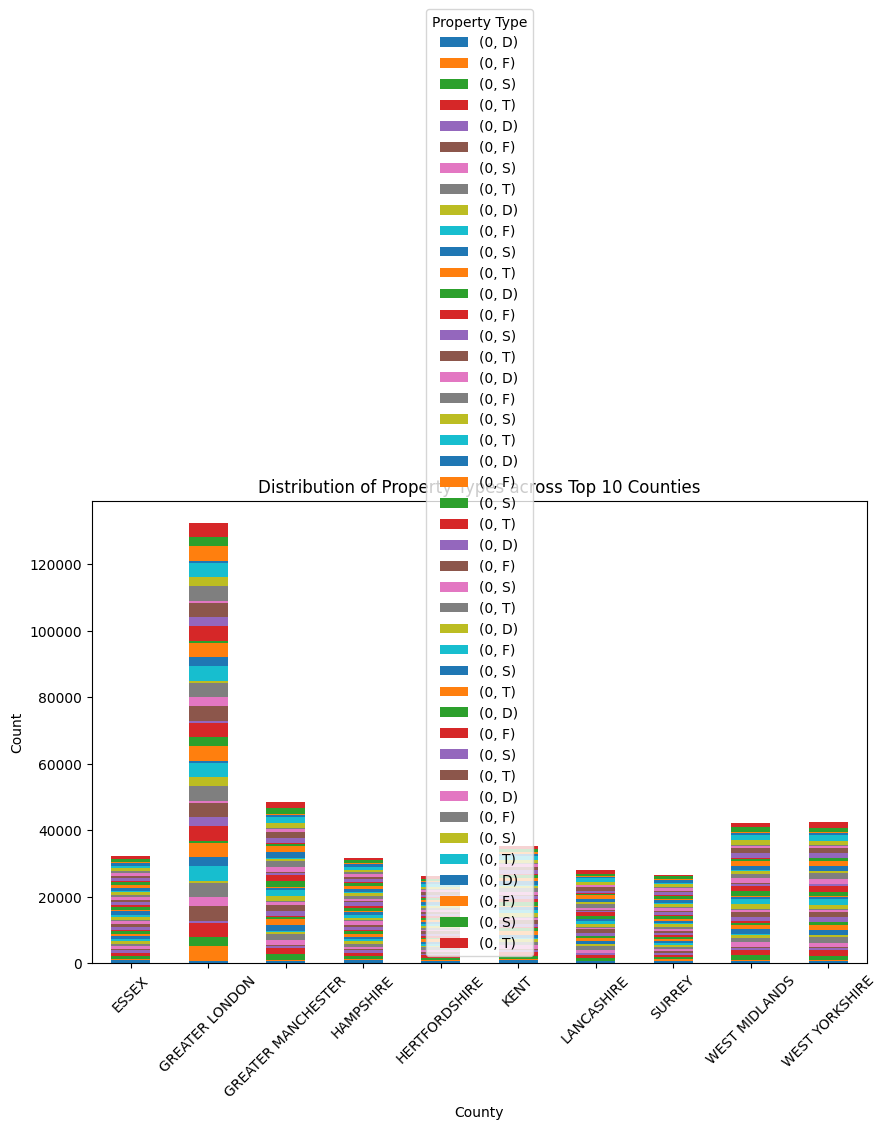

In [75]:
# Filtering for top 10 counties
top_10_counties = modin_df['County'].value_counts().head(10).index
modin_df_top_10_counties = modin_df[modin_df['County'].isin(top_10_counties)]

# Creating a pivot table to count property types per county
property_types_per_county = modin_df_top_10_counties.pivot_table(index='County', columns='Property Type', aggfunc='size', fill_value=0)

# Plotting a grouped bar chart
property_types_per_county.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Property Types across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

5. How does the average property price differ across top 10 districts?

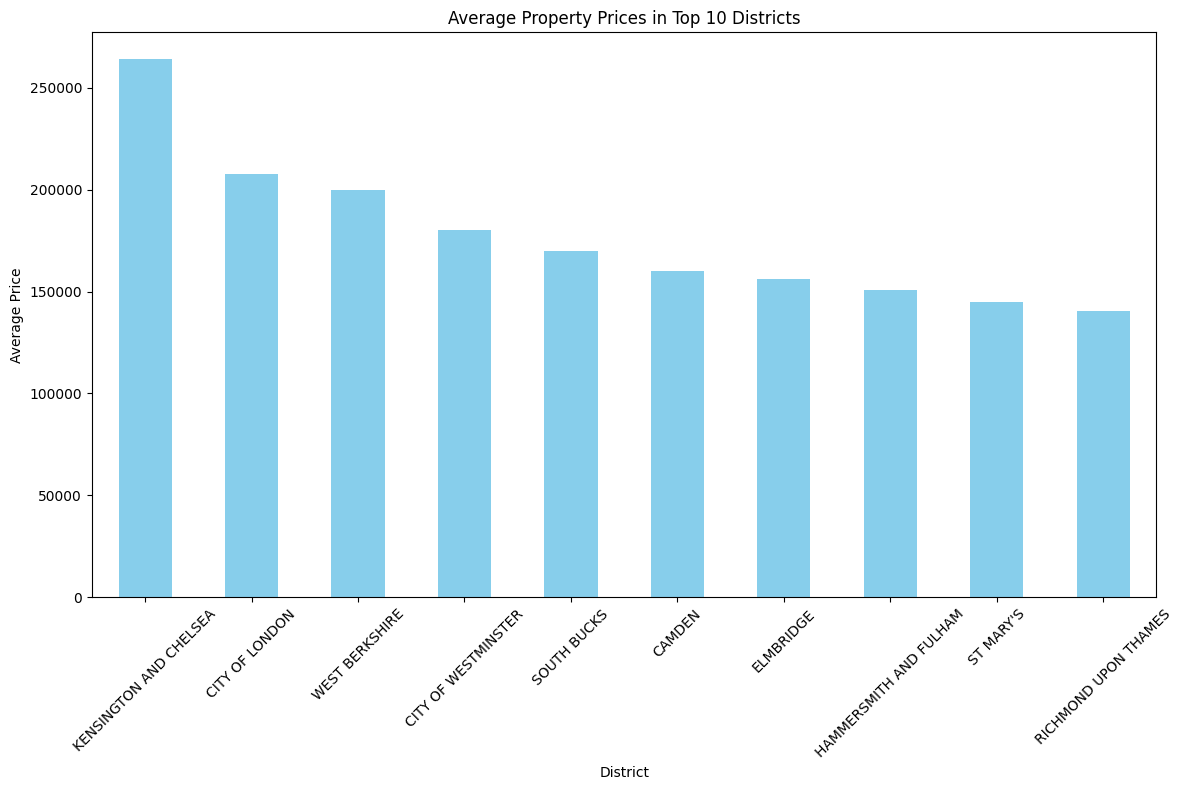

In [76]:
# Calculate the mean property price for each district
mean_prices = modin_df.groupby('District')['Price'].mean().sort_values(ascending=False).head(10)

# Plotting a bar graph for average property prices across top 10 districts
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Property Prices in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Answer:** Kensington and Chelsea District has the highest average price for the property. On the other end of the spectrum, Hammersmith and Fulham, St Mary's, and Richmond Upon Thames hold the lowest number of properties, and their counts are relatively similar. This observation suggests a potential rural setting for these areas, contributing to their lower property numbers.

##**4. Inferences and Conclusion**

The analysis was conducted on a substantial dataset encompassing UK Property Price data from 1995 to 2023, totaling approximately 4.94 GB. The dataset was efficiently managed using the Modin library, designed for handling large datasets by employing parallel and distributed computing. Various steps were undertaken to prepare the dataset for analysis. This included operations such as sampling, renaming columns, optimizing data types, resolving missing values, and removing unneeded columns. This ensured that the dataset was refined and organized for comprehensive analysis.<br>

Following data preparation, statistical measures like mean, sum, range, and other key statistics were computed for numeric columns. Histograms were employed to visually portray the distributions of numeric data, enabling a better understanding of the frequency distributions and patterns within the dataset. The analysis further delved into exploring relationships between different columns using scatter plots, bar charts, and line graphs. A line graph depicting the trend of annual property transactions over the years offered insights into the fluctuation or trends in transaction volumes over time.<br>

In summary, this comprehensive analysis provided crucial insights into the UK Property Price dataset. It facilitated a deeper comprehension of data trends, patterns, and potential areas for further investigation, thereby serving as a foundation for informed decision-making and future detailed analyses in the real estate domain.